In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [21]:
# Clear any logs from previous runs
# %rm -rf ./logs/

In [22]:
mnist = tf.keras.datasets.mnist

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

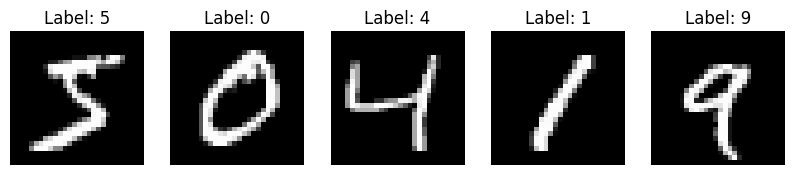

In [24]:
# Display 5 images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap="gray")  # Use grayscale for better visualization
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")  # Remove axis ticks
plt.show()

In [25]:
def create_model():
    return tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation="softmax"),
        ]
    )

In [26]:
model = create_model()

c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [28]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [29]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
)
# model.fit(x_train, y_train, epochs=5)
# model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.8563 - loss: 0.4884 - val_accuracy: 0.9561 - val_loss: 0.1449
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.9555 - loss: 0.1504 - val_accuracy: 0.9692 - val_loss: 0.1009
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.9689 - loss: 0.1044 - val_accuracy: 0.9714 - val_loss: 0.0860
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.9742 - loss: 0.0870 - val_accuracy: 0.9774 - val_loss: 0.0721
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.9774 - loss: 0.0725 - val_accuracy: 0.9788 - val_loss: 0.0669


In [30]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.9751 - loss: 0.0789
Test Loss: 0.0669
Test Accuracy: 0.9788


In [31]:
# Get training history
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.9807 - loss: 0.0604
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.9816 - loss: 0.0562
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.9843 - loss: 0.0477
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.9862 - loss: 0.0435
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step - accuracy: 0.9871 - loss: 0.0401


In [32]:
# Extract loss and accuracy values from history
train_loss = history.history["loss"]
train_acc = history.history["accuracy"]

In [34]:
# import pickle
# with open('mnist_model.pkl', 'wb') as file:  # Use 'wb' for writing in binary mode
#     pickle.dump(model, file)

model.save("mnist_model.keras")

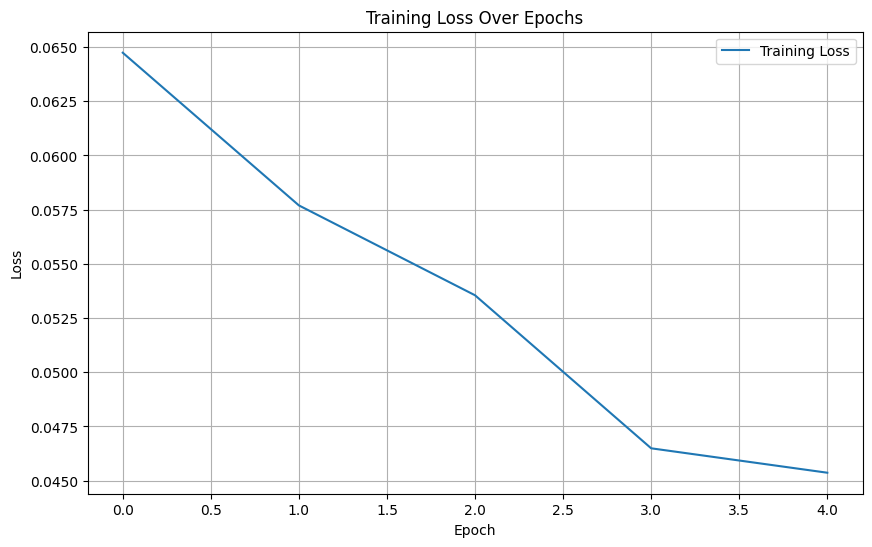

In [ ]:
# Plot training loss
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(train_loss, label="Training Loss")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

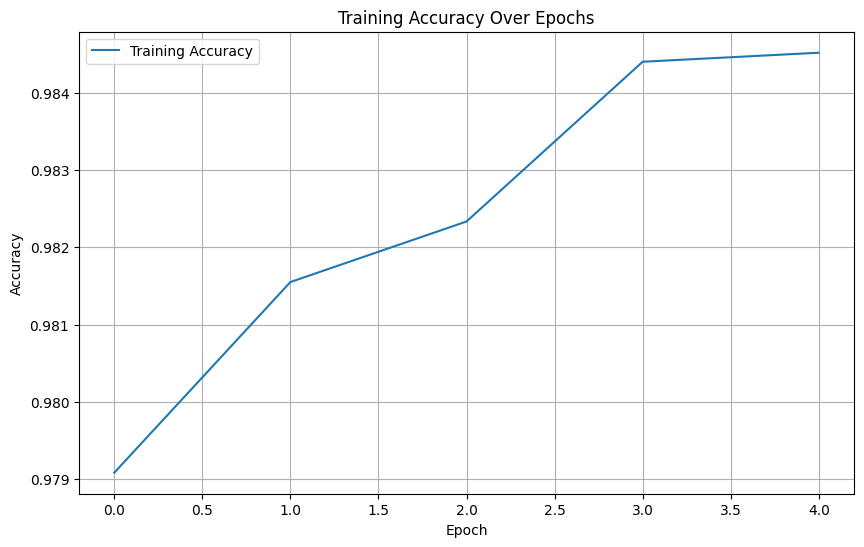

In [ ]:
# Plot training accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label="Training Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 449952), started 60 days, 16:45:22 ago. (Use '!kill 449952' to kill it.)

In [ ]:
# !kill 449952